In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from torchvision import datasets

from torch.utils import tensorboard

In [20]:
writer=tensorboard.SummaryWriter('runs/experiment_1')

In [21]:
from torchvision.transforms import ToTensor

train_data= datasets.MNIST(train=True,
                           root='data',
                           transform=ToTensor(),
                           download=True)
test_data=datasets.MNIST(train=True,
                           root='data',
                           transform=ToTensor(),
                           download=True)


print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Text(0.5, 1.0, '5')

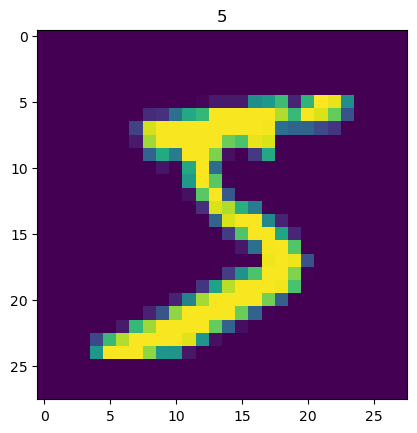

In [22]:
plt.imshow(train_data.data[0])
plt.title(train_data.targets[0].item())

In [23]:
train_loader=torch.utils.data.DataLoader(train_data,
                                    batch_size=100,
                                    shuffle=True)

train_loader=torch.utils.data.DataLoader(test_data,
                                    batch_size=100,
                                    shuffle=True)

In [24]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 30568), started 0:47:48 ago. (Use '!kill 30568' to kill it.)

In [ ]:
#create a model
#conv() -> relu -> maxpool

In [30]:
data_sample=iter(train_loader)
images, targets = next(data_sample)
image_grid= torchvision.utils.make_grid(images)
writer.add_images('Sample MNIST', image_grid)

AssertionError: size of input tensor and input format are different.         tensor shape: (3, 392, 242), input_format: NCHW

In [26]:
import torch.nn as nn
import torch.nn.functional as F
class mnist_cnn(nn.Module):
  def __init__(self):
    super(mnist_cnn, self).__init()

    self.conv_1=nn.Sequential(
        nn.Conv2D(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2
        ),
        nn.Relu(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_2=nn.Squential(
        nn.Conv2D(16,32,5,1,2),
        nn.Relu(),
        nn.MaxPool2d(2)

    )

    self.linear_1=nn.Linear(32*7*7,10)

    def forward(self,x):
      x_1 = self.conv_1(x)
      x_2 = self.conv_2(x_1)
      x=x.view(x.size(0),-1)
      out=self.Linear(x_2)

      return out,x

In [27]:
model= mnist_cnn()
print(model)

writer.add

AttributeError: 'super' object has no attribute '_mnist_cnn__init'

In [31]:
#define loss function and optimizer
from torch.autograd import Variable

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
#trainin loops
epochs = 5
model.train()
for e in range(epochs): #loop over the nmber of epochs
    running_loss = 0.0
    for i in (images, labels) in enumerate(train_loader): #loop over batch size = 100
        b_x = Variable(images)
        b_y = Variable(labels)

out = model(b_x)[0]
loss = loss_func(out, b_y)
running_loss += loss 


NameError: name 'model' is not defined